In [184]:
import pandas as pd
import numpy as np
import timeit
import matplotlib.pyplot as plt
mainpath = "/Users/erick/OneDrive/Escritorio/Jarvis2/Jupyter/datasets"

# Dataset de atributos básicos

### Import con Open

In [3]:
data_pl = []
with open(mainpath + '/' + 'title.basics.tsv',encoding='utf-8', errors='ignore') as f:
    lines = f.readlines()
    for line in lines:
        data_pl.append(line.split('\t'))

In [4]:
# Selección de los datos que son películas o cortos
data_pelis = []
data_pelis.append(data_pl[0])
for ind in range(len(data_pl)):
    if (data_pl[ind][1]=='short' or data_pl[ind][1]=='movie' or data_pl[ind][1]=='tvMovie' or data_pl[ind][1]=='NaN'):
        data_pelis.append(data_pl[ind])

In [5]:
# Se guarda en un DataFrame
DFPelis = pd.DataFrame(data_pelis[1:],columns=data_pelis[0])

### Import con Pandas

In [13]:
#opening the dataset using pandas
data = pd.read_csv(mainpath + '/' + 'title.basics.tsv', delimiter = '\t')
data.head()

C:\Users\erick\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [79]:
#Muestra de los tipos de títulos sin repetición
set(data['titleType'])

{'movie',
 'short',
 'tvEpisode',
 'tvMiniSeries',
 'tvMovie',
 'tvPilot',
 'tvSeries',
 'tvShort',
 'tvSpecial',
 'video',
 'videoGame'}

# Dataset de ratings

### Ya solo con pandas

In [6]:
data_rt = pd.read_csv(mainpath + '/' + 'title.ratings.tsv.csv', delimiter = ',')
#data_rt.head()

In [7]:
#Condiciones para buscar las películas con más de 7.5 de calificadión y más de 1000 votos
good_ind = data_rt['averageRating']>7.5
votes = data_rt['numVotes']>1000

In [8]:
#Intersección de las condiciones anteriores y guardado del folio 'tconst'
inter = np.logical_and(good_ind,votes)
tconst = data_rt.loc[inter].drop(['numVotes'],axis=1)

## Películas selectas por ver

In [9]:
#Se usa la función merge para encontrar la intersección según los folios tconst
prueba = pd.merge(DFPelis,tconst, how='right',on=['tconst'])

In [10]:
#Finalmente se guarda en FinalDF omitiendo las columnas del primer drop
# porque no aportan nada y omitiendo los renglones con valores NaN
FinalDF = prueba.drop(['endYear','tconst','isAdult'],axis=1).dropna()

In [11]:
FinalDF

,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres\n,averageRating
0,short,A Trip to the Moon,Le voyage dans la lune,1902,13,"Action,Adventure,Comedy\n",8.2
1,short,The Cameraman's Revenge,Mest kinematograficheskogo operatora,1912,12,"Animation,Comedy,Fantasy\n",7.7
2,movie,Intolerance,Intolerance: Love's Struggle Throughout the Ages,1916,163,"Drama,History\n",7.7
3,short,The Immigrant,The Immigrant,1917,30,"Comedy,Drama,Romance\n",7.6
4,short,A Dog's Life,A Dog's Life,1918,33,"Comedy,Drama,Short\n",7.7
...,...,...,...,...,...,...,...
22326,tvMovie,Terra,Terra,2015,98,Documentary\n,8.3
22345,short,Alan Partridge's Scissored Isle,Alan Partridge's Scissored Isle,2016,44,"Comedy,Short\n",8.0
22368,movie,Hindi Medium,Hindi Medium,2017,132,"Comedy,Drama\n",7.9
22383,movie,Dominion,Dominion,2018,120,Documentary\n,9.1


## A continuación se divide en cortos y películas

In [12]:
DFShorts = FinalDF[FinalDF['titleType']=='short'].drop('titleType',axis=1)
len(DFShorts)

393

In [13]:
PelisFinal = FinalDF[FinalDF['titleType']!='short'].drop('titleType',axis=1)
len(PelisFinal)

4162

#### *Export & import de los dataframes para no repetir lo anterior*

In [15]:
DFShorts.to_csv(mainpath + r'/shorts75.csv', index=False, header = True)
PelisFinal.to_csv(mainpath + r'/movies75.csv', index=False, header = True)

In [2]:
#Aquí se importan nuevamente
DFShorts = pd.read_csv(mainpath + '/shorts75.csv', delimiter = ',')
DFMovies = pd.read_csv(mainpath + '/movies75.csv', delimiter = ',')

# Gráficas que muestran la duración

### Histograma de los cortos

In [59]:
# Se hace una depuración debido a que 
#hay algunos títulos sin valores de duración
DFShorts1 = DFShorts[DFShorts['runtimeMinutes']!='\\N']
dur_sho = sorted(list(map(int, DFShorts1['runtimeMinutes'])))

Text(0.5, 1.0, 'Short Durations')

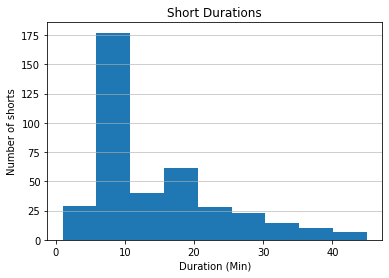

In [108]:
# Histograma 
plt.hist(dur_sho, bins = 9)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Duration (Min)')
plt.ylabel('Number of shorts')
plt.title('Short Durations')

### Histograma de películas

In [115]:
# Depuración de títulos sin duración
DFMovies1 = DFMovies[DFMovies['runtimeMinutes']!='\\N']
dur_mov = sorted(list(map(int, DFMovies1['runtimeMinutes'])))

Text(0.5, 1.0, 'Movie Durations')

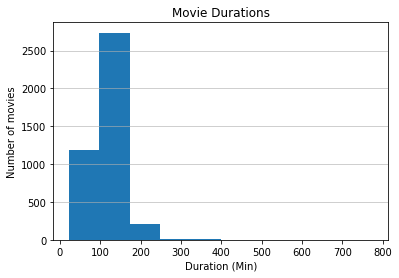

In [100]:
# Histograma
plt.hist(dur_mov, bins = 10)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Duration (Min)')
plt.ylabel('Number of movies')
plt.title('Movie Durations')

Como en los datos de las películas hay outliers, hacen poco efectivo el método del histograma.
Por lo tanto, se hará una función para contar intervalos, el último intervalo iría desde los 225 minutos hasta el valor de la película más larga. Debido a esto se hará un gráfico de barras para presentar los datos.

In [181]:
# Función para contar los elementos de una lista por intervalos cerrados
def count_interval(li, ini, fin):
    cont = 0
    for val in range(ini,fin+1):
        cont = cont + li.count(val)
    return cont;

Esta función puede ser poco eficiente ya que para los outliers se estaría iterando hasta llegar a esos valores, lo cual es una pérdida de tiempo. A continuación se hace una función que toma en cuenta solo los elementos de la lista pertenecientes al intervalo. Por ejemplo, si se tiene el array arr = [1,2,1,1,2,4,5,5,6] y se usa la función anterior en el intervalo range(1,10), se iteraría en todos los elementos del intervalo incluso cuando la lista solo llega hasta cierto valor.

In [167]:
# Función para contar los elementos de una lista pertenecientes a un intervalo cerrado
def count_interval_pro(li, ini, fin):
    con = 0
    for val in list(set(dur_mov)):
        if (val >= ini and val <= fin):
            con = con + li.count(val)
    return con

In [196]:
#Nomás pa ver si sí es más eficiente la nueva función, se toma el tiempo 
# de todos los valores posibles 
t0=timeit.default_timer()
count_interval(dur_mov, 0, dur_mov[-1])
t1 = timeit.default_timer()
t0_pro=timeit.default_timer()
count_interval_pro(dur_mov, 0, dur_mov[-1])
t1_pro = timeit.default_timer()
tnoob = t1-t0
tpro = t1_pro-t0_pro
print('El tiempo de la función ineficiente es ' + str(tnoob) + ' mientras que el de la función mejorada es ' + str(tpro))

El tiempo de la función ineficiente es 0.08530079999763984 mientras que el de la función mejorada es 0.02125259999957052


Se aprecia una diferencia notable, por lo  cual se usará solo la segunda función.

In [219]:
# Se realiza una lista con la cantidad de películas en intervalos de 45 minutos
# primero se hace una lista con los valores de los intervalos
intervalos = list(np.array(range(0,6))*45)
intervalos.append(dur_mov[-1])
hist_mov = []
for ind in range(0,len(intervalos)):
    if ind == len(intervalos)-1:
        break
    else:
        hist_mov.append(count_interval_pro(dur_mov,intervalos[ind],intervalos[ind+1]))

###### Ahora sí la gráfica

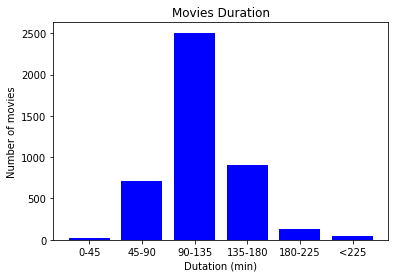

In [232]:
# No se usará la función histograma, sino un plot de barras
plt.bar(intervalos[0:6], hist_mov, color ='blue',
        width = 35, tick_label = ['0-45','45-90','90-135','135-180','180-225','<225'])
 
plt.xlabel("Dutation (min)")
plt.ylabel("Number of movies")
plt.title("Movies Duration")
plt.show()

### Se realizará ahora un breve análisis de las proporciones de la duración de los cortos y películas